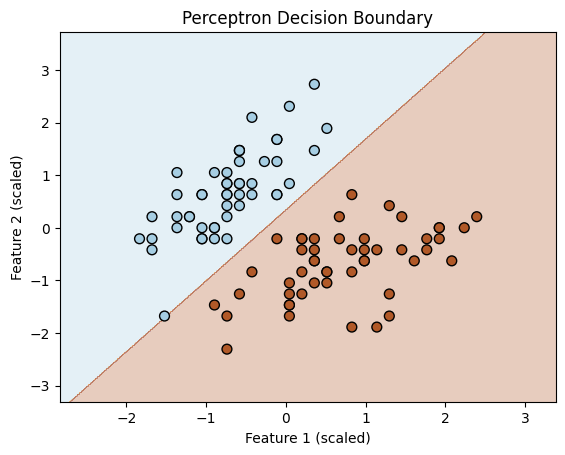

Problem with Perceptron

we saw in previous class it draws a boundry line between 2 categories and by training we calculate weight & bais

But as we randomly give started value so it always give differnet boundary lines so we can not quantify our result like which line is good and obviusly weight & bais associated to them also different.

#  Loss Function


A loss function (also known as a cost function or objective function) is a measure of how well the model's predictions match the true target values in the training data. The loss function quantifies the difference between the predicted output of the model and the actual output, providing a signal that guides the optimization process during training.

**Loss Function for Perceptron**

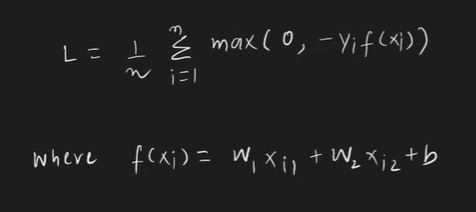

is main agr max function kaam kesy krta or is ki mathematics smjhain to hum khty k yeah likha hua hy

X = -Yif(Xi)
max (0, X)

ab agr x>0 ho ga then max ki value x and agr X <0 ho ga to max will return 0 output.

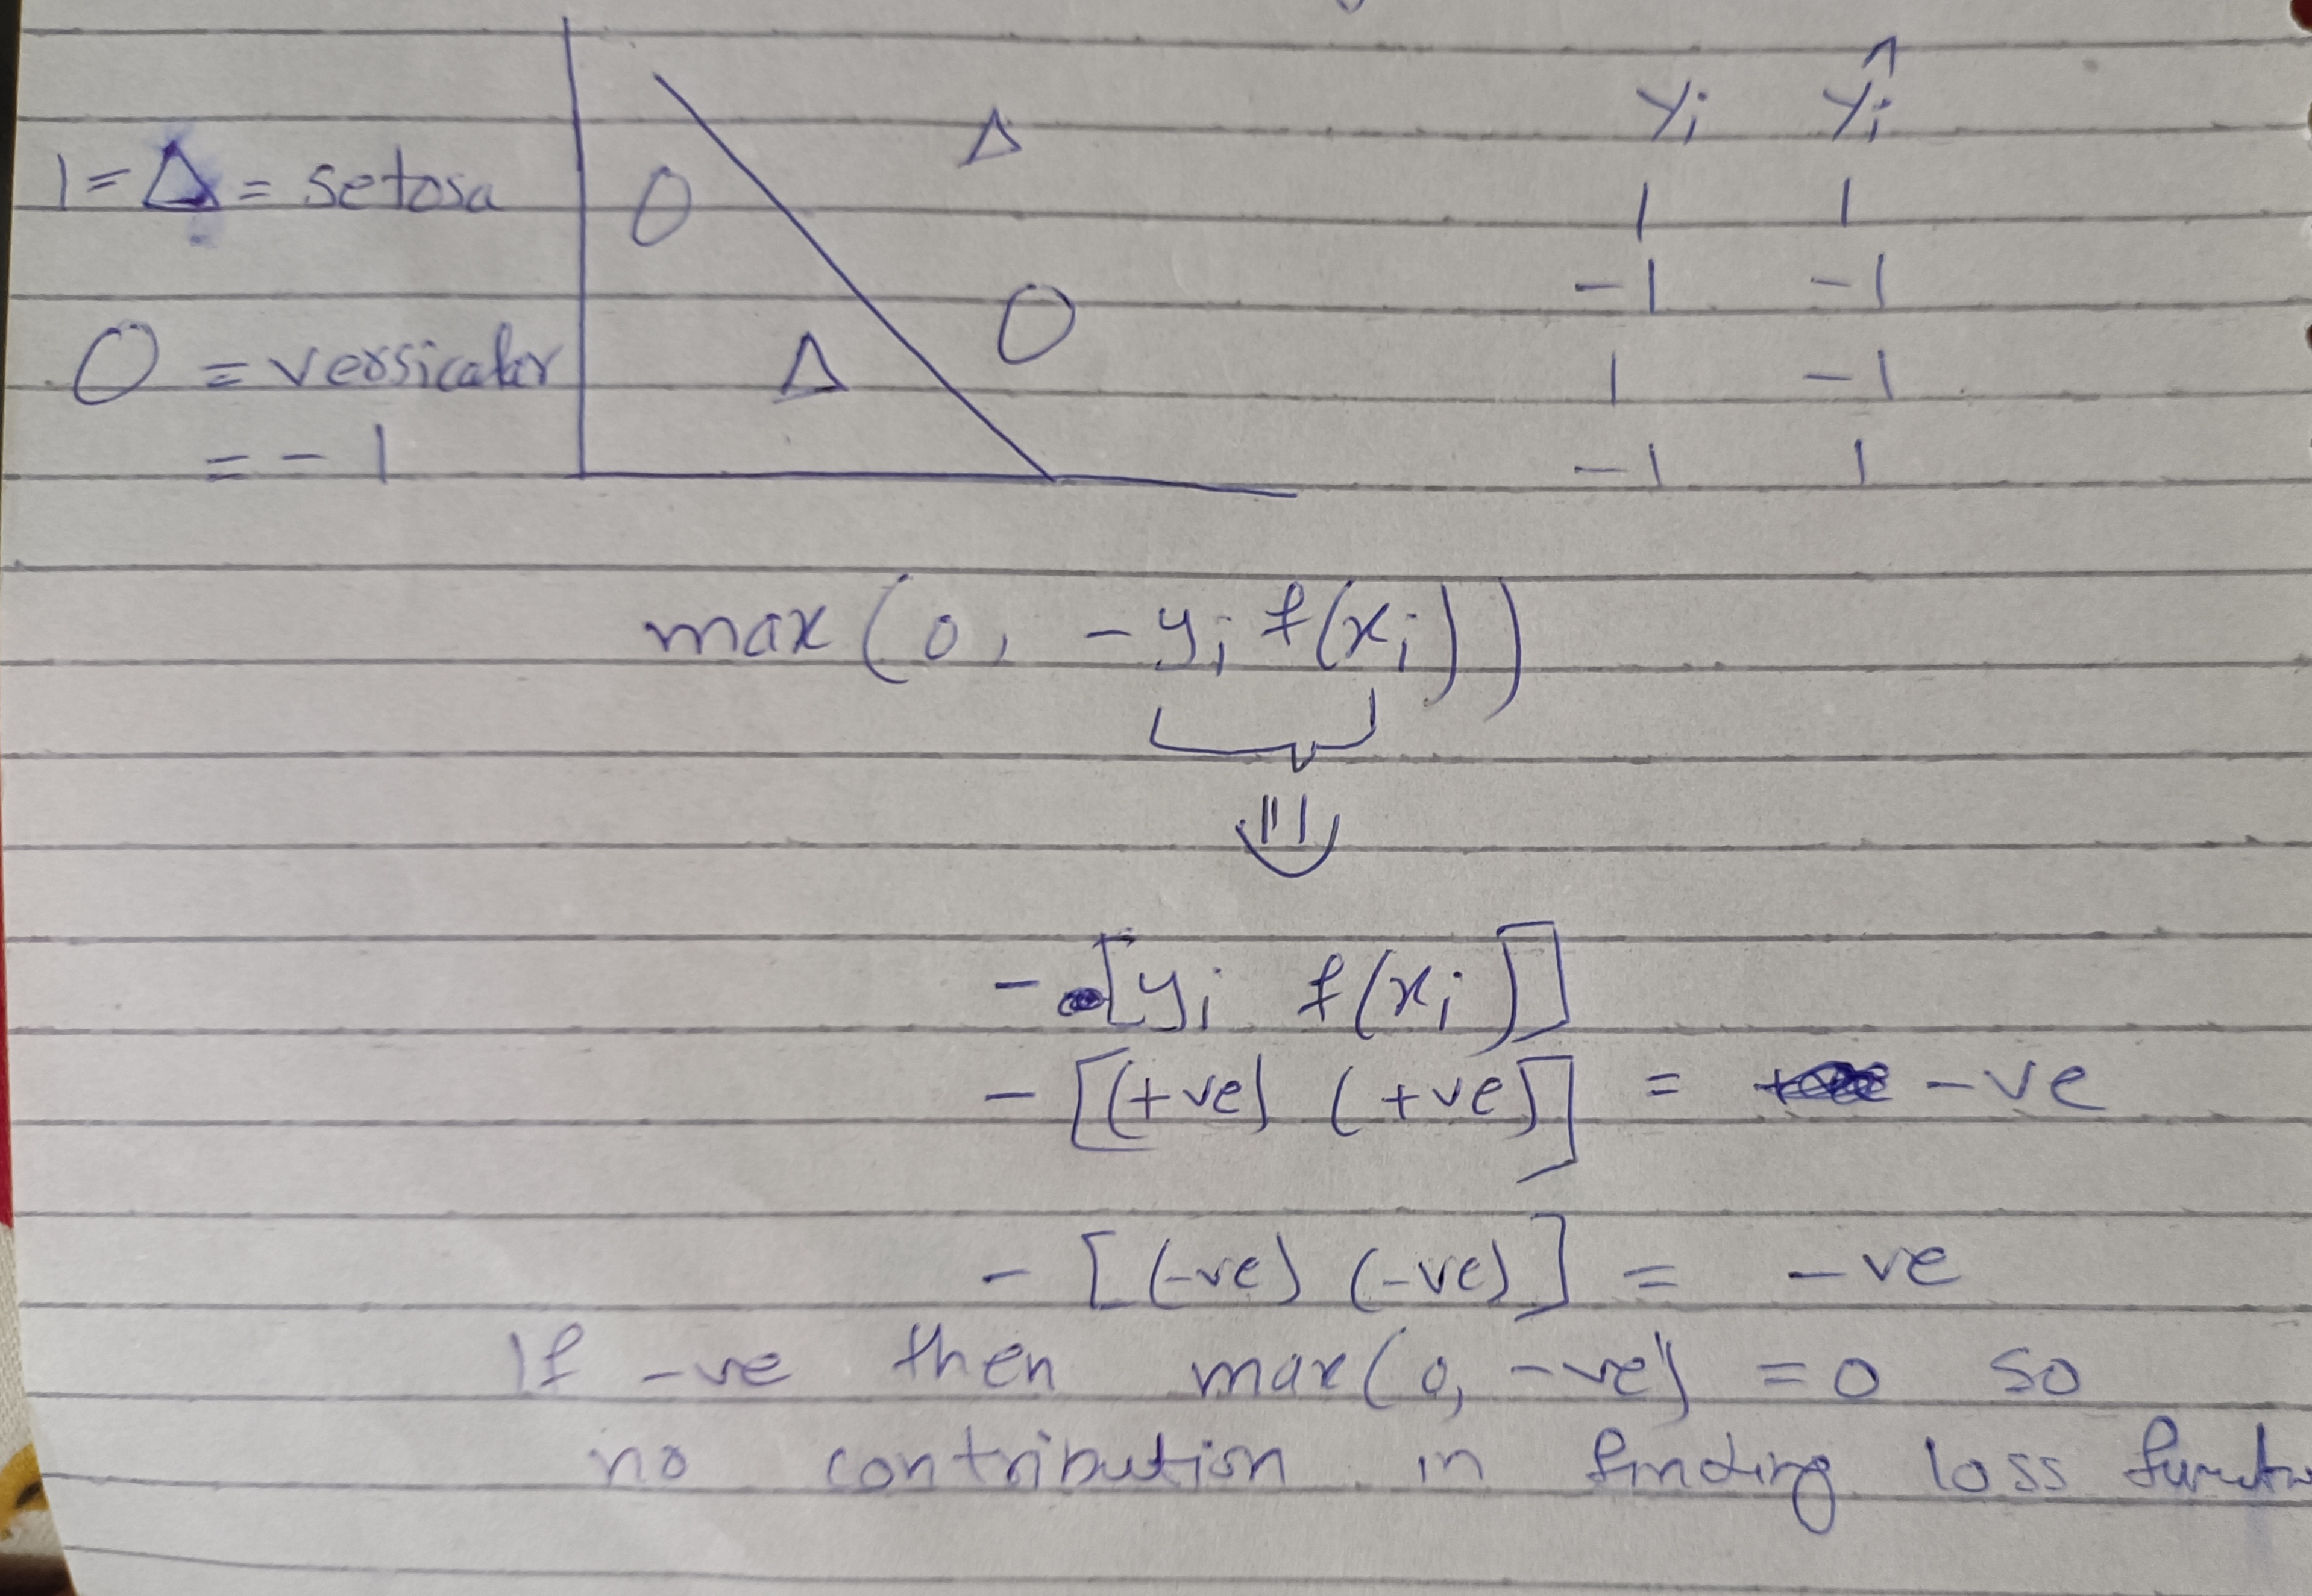

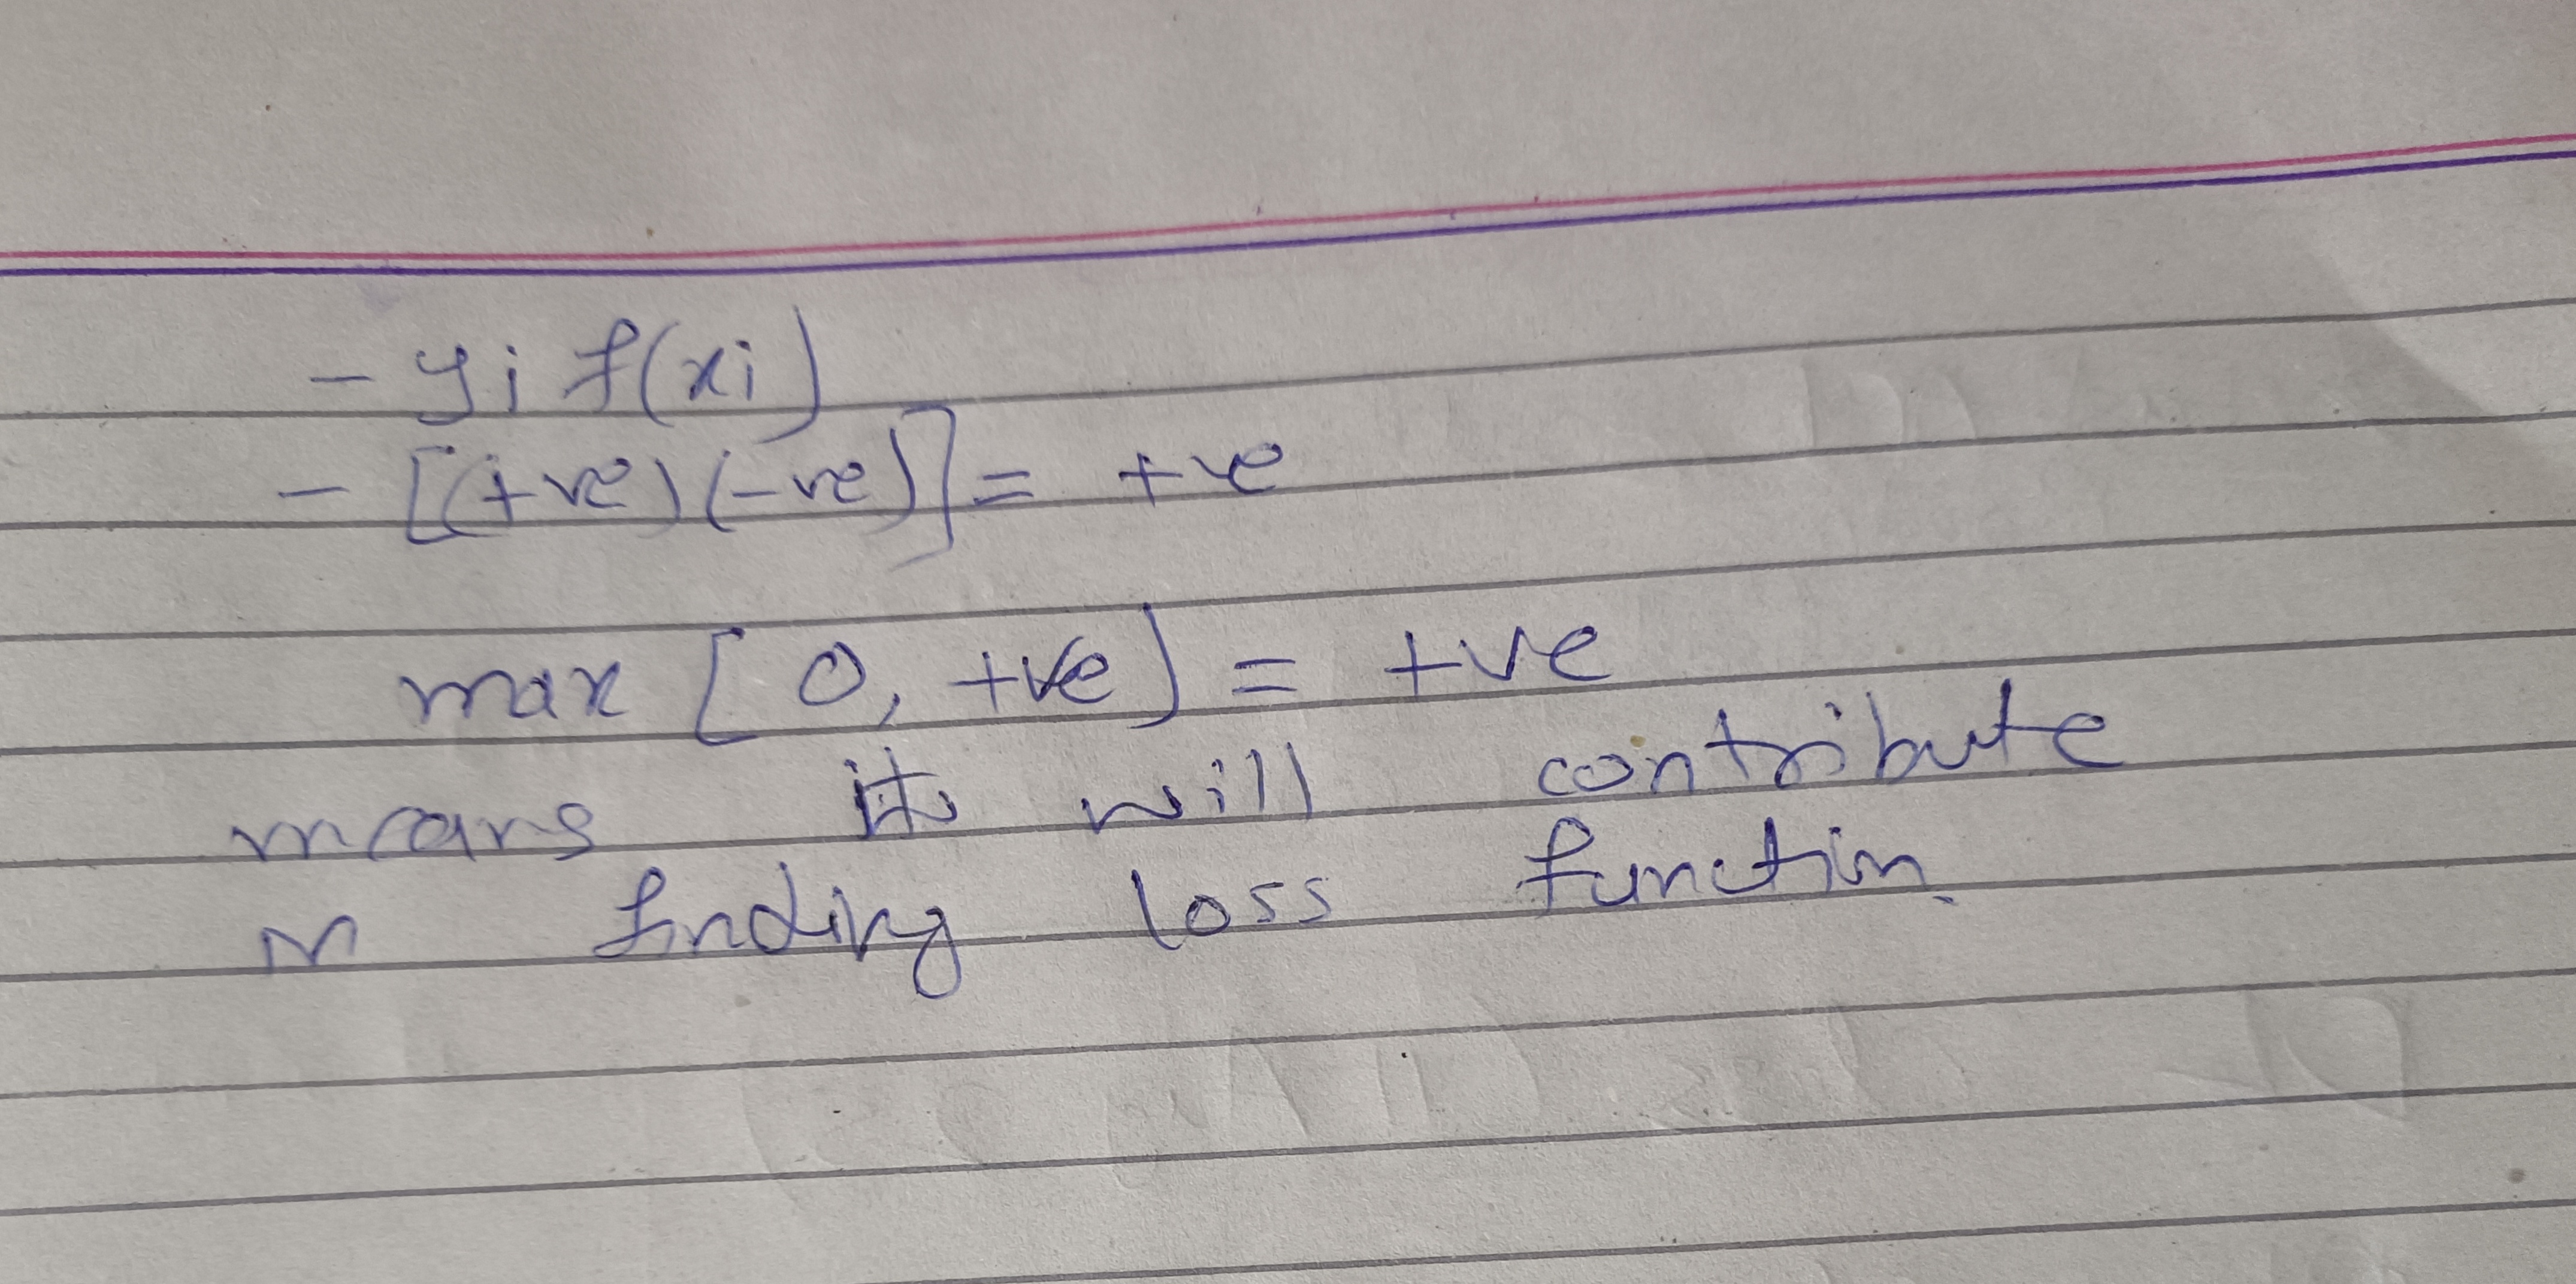

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

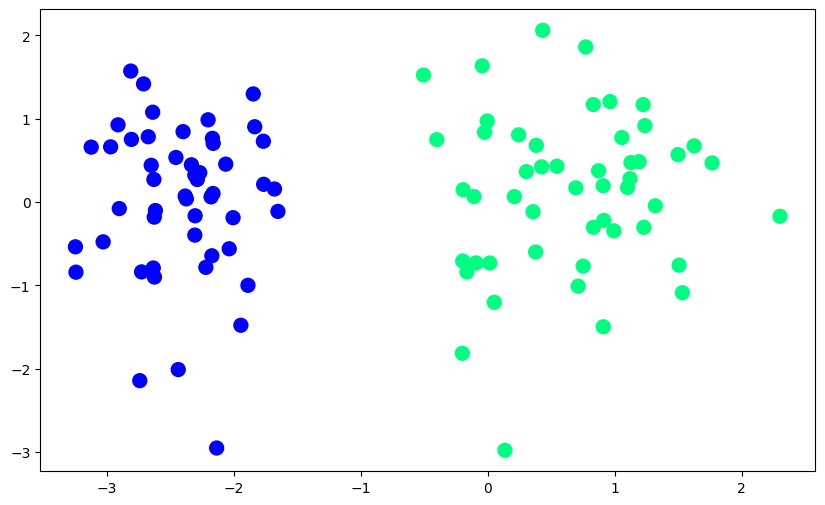

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b


In [ ]:
w1,w2,b = perceptron(X,y)

In [ ]:
w1

np.float64(1.006638570722407)

In [ ]:
b

np.float64(1.3000000000000003)

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

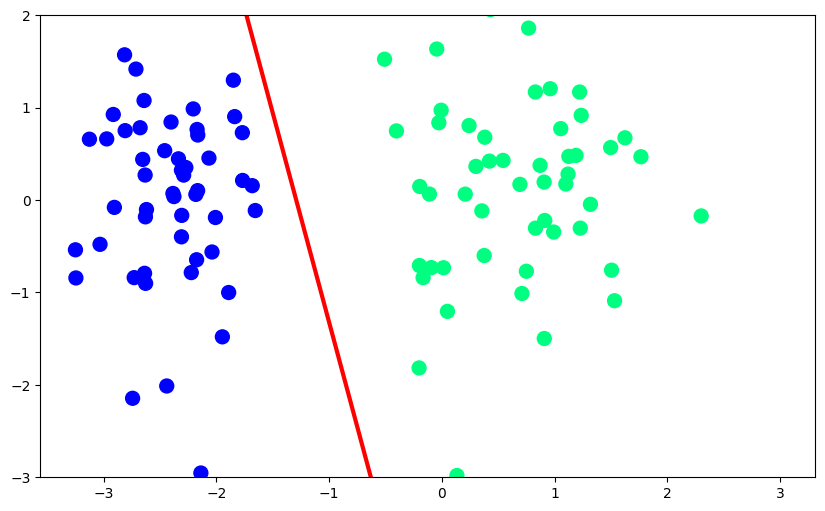

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#Limitations of perceptron

it can not separate non linear data

In [ ]:
# =========================
# Perceptron Classification of AND & XOR Gates
# =========================

# Import necessary libraries
import numpy as np                  # For numerical computations and array handling
import matplotlib.pyplot as plt     # For plotting graphs
from sklearn.linear_model import Perceptron  # Perceptron model from scikit-learn


In [ ]:
# -------------------------
# Step 1: Prepare Data (Truth tables)
# -------------------------

# Input combinations for logic gates (two inputs: 0 or 1)
X = np.array([
    [0, 0],  # Input 1 = 0, Input 2 = 0
    [0, 1],  # Input 1 = 0, Input 2 = 1
    [1, 0],  # Input 1 = 1, Input 2 = 0
    [1, 1]   # Input 1 = 1, Input 2 = 1
])

# Output labels for AND gate
# Rule: Output is 1 only if both inputs are 1
y_and = np.array([0, 0, 0, 1])

# Output labels for XOR gate
# Rule: Output is 1 if inputs are different, else 0
y_xor = np.array([0, 1, 1, 0])


AND Gate:
Weights: [[2. 2.]]
Bias: [-3.]


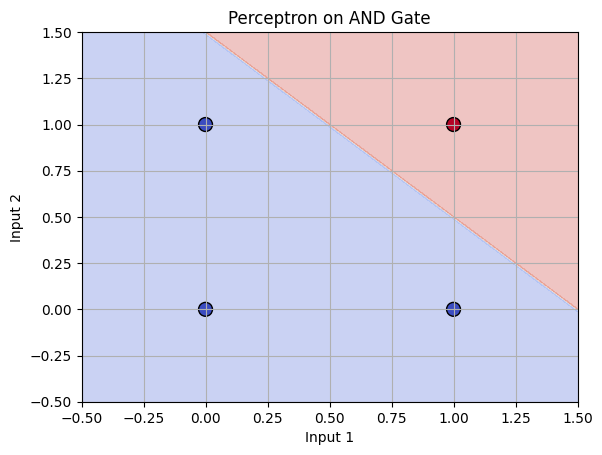


XOR Gate:
Weights: [[0. 0.]]
Bias: [0.]


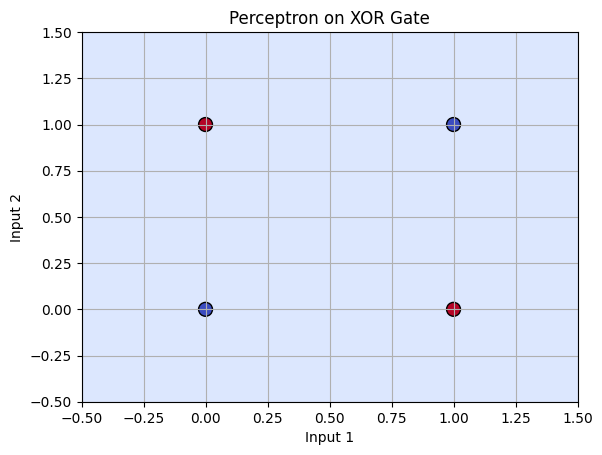

In [ ]:
# -------------------------
# Step 2: Function to train and plot classifier
# -------------------------

def train_and_plot(clf, X, y, title):
    """
    Trains a classifier model (like Perceptron or MLP) on given inputs (X) and outputs (y),
    and plots the decision boundary.
    """

    # Train (fit) the model on given data
    clf.fit(X, y)

    # Print model's learned parameters
    print(f"\n{title} Gate:")
    # Check if the classifier has 'coef_' (weights) and 'intercept_' (bias) attributes
    if hasattr(clf, 'coef_'):
        print("Weights:", clf.coef_)
    if hasattr(clf, 'intercept_'):
        print("Bias:", clf.intercept_)


    # -------------------------
    # Step 3: Plot the decision boundary
    # -------------------------

    # Define the plotting range
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    # Create a grid of points to test the model on
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),  # 100 points between min and max for X-axis
        np.linspace(y_min, y_max, 100)   # 100 points between min and max for Y-axis
    )

    # Predict the output for every point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # ravel() flattens the grid arrays, c_ combines them into (x,y) pairs
    Z = Z.reshape(xx.shape)                         # Reshape predictions back into grid shape for contour plotting

    # Draw filled contour plot showing decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.coolwarm, edgecolors='k')

    # Add labels and title
    plt.title(f"Perceptron on {title} Gate")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)  # Show grid lines for clarity

    # Show the plot
    plt.show()

# -------------------------
# Step 4: Train & Visualize
# -------------------------
# Create a Perceptron model for the AND gate
perceptron_and = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
train_and_plot(perceptron_and, X, y_and, "AND")  # Perceptron works fine for AND (linearly separable)

# Create a Perceptron model for the XOR gate
perceptron_xor = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
train_and_plot(perceptron_xor, X, y_xor, "XOR")  # Perceptron fails for XOR (non-linearly separable)

#Multi Layer Perceptron (MLP)

some of the limitations of Perceptrons can be eliminated by
stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron
(MLP)

The network is typically organized into layers, starting with the input layer, where data is introduced. Followed by hidden layers where computations are performed and finally, the output layer where predictions or decisions are made.

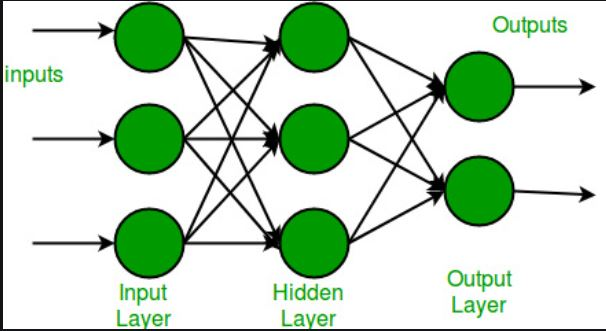

How to train MLP then a new algorithm was introduced i.e called

**backpropagation training algorithm**

before is ko hum smjhain 1st 1 aur activation function hy sigmoid

Sigmoid Activation as it will introduce non linearity

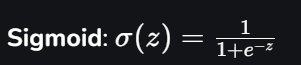

In [ ]:
from sklearn.neural_network import MLPClassifier


Final Predictions after training:
[[0.06368082]
 [0.94085536]
 [0.94108726]
 [0.06402009]]


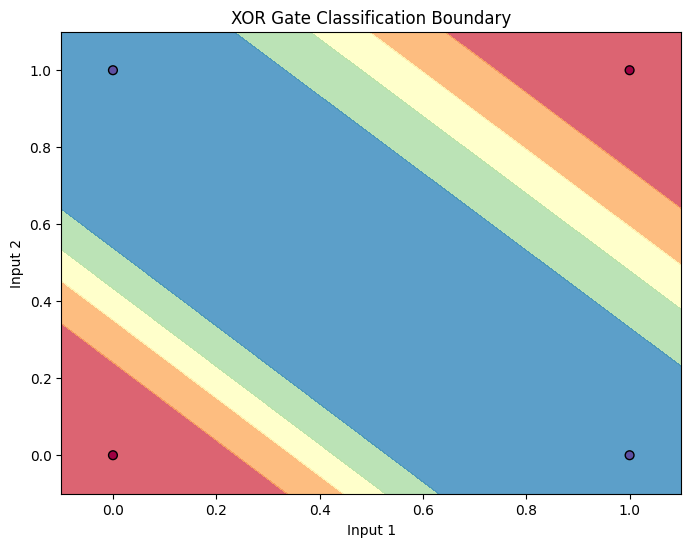

In [ ]:
import numpy as np # Import the NumPy library for numerical operations and array manipulation.
import matplotlib.pyplot as plt # Import Matplotlib's pyplot for creating plots and visualizations.

# Define the sigmoid activation function.
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # This function applies the sigmoid activation, which squashes values between 0 and 1.

# Define the derivative of the sigmoid function, which is needed for backpropagation.
def sigmoid_derivative(x):
    return x * (1 - x) # The derivative of the sigmoid is its output multiplied by 1 minus its output.

# Input data for the XOR gate. Each row is a different input combination.
X = np.array([[0,0], [0,1], [1,0], [1,1]])
# The expected output for each input combination.
y = np.array([[0], [1], [1], [0]])

# Define the architecture and hyperparameters of the neural network.
input_neurons = 2 # The number of neurons in the input layer (two inputs for XOR).
hidden_neurons = 2 # The number of neurons in the hidden layer.
output_neurons = 1 # The number of neurons in the output layer (one output for XOR).
learning_rate = 0.1 # A hyperparameter that controls how much the weights are adjusted.
epochs = 10000 # The number of times the entire dataset will be passed through the network.

# Initialize weights and biases with random values.
np.random.seed(1) # Set a random seed for reproducibility of results.
hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons)) # Weights for connections from the input to the hidden layer.
hidden_bias = np.random.uniform(size=(1, hidden_neurons)) # Bias for the hidden layer neurons.
output_weights = np.random.uniform(size=(hidden_neurons, output_neurons)) # Weights for connections from the hidden to the output layer.
output_bias = np.random.uniform(size=(1, output_neurons)) # Bias for the output layer neuron.

# Start the training loop.
for _ in range(epochs): # Iterate for the specified number of epochs.
    # --- Forward Propagation ---
    hidden_layer_activation = np.dot(X, hidden_weights) + hidden_bias # Calculate the weighted sum of inputs for the hidden layer.
    hidden_layer_output = sigmoid(hidden_layer_activation) # Apply the sigmoid activation to get the hidden layer's output.

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias # Calculate the weighted sum for the output layer.
    predicted_output = sigmoid(output_layer_activation) # Apply sigmoid to get the final predicted output.

    # --- Backpropagation ---
    error = y - predicted_output # Calculate the error by finding the difference between the actual and predicted outputs.
    d_predicted_output = error * sigmoid_derivative(predicted_output) # Calculate the gradient of the error with respect to the output.

    error_hidden_layer = d_predicted_output.dot(output_weights.T) # Propagate the error backward to the hidden layer.
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output) # Calculate the gradient for the hidden layer.

    # --- Update Weights and Biases ---
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate # Update the weights of the output layer.
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate # Update the bias of the output layer.
    hidden_weights += X.T.dot(d_hidden_layer) * learning_rate # Update the weights of the hidden layer.
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate # Update the bias of the hidden layer.

print("Final Predictions after training:") # Print the final predictions after the network has been trained.
print(predicted_output) # Display the final output values, which should be close to the true XOR outputs.

# Define a function to plot the decision boundary.
def plot_decision_boundary(X, y, hidden_weights, hidden_bias, output_weights, output_bias):
    plt.figure(figsize=(8, 6)) # Create a figure with a specified size.

    # Create a meshgrid to plot the decision boundary over a continuous space.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # Set the minimum and maximum for the x-axis.
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 # Set the minimum and maximum for the y-axis.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01)) # Create a grid of points.

    # Predict the output for each point in the meshgrid.
    grid_data = np.c_[xx.ravel(), yy.ravel()] # Flatten the meshgrid into a list of points.

    hidden_layer_activation = np.dot(grid_data, hidden_weights) + hidden_bias # Forward pass for the grid points to the hidden layer.
    hidden_layer_output = sigmoid(hidden_layer_activation) # Apply activation function.

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias # Forward pass to the output layer.
    Z = sigmoid(output_layer_activation) # Final prediction for each grid point.
    Z = Z.reshape(xx.shape) # Reshape the predictions back into a grid format.

    plt.contourf(xx, yy, Z, levels=5, cmap=plt.cm.Spectral, alpha=0.8) # Plot the filled contours of the decision boundary.
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='k') # Plot the original XOR data points.
    plt.title('XOR Gate Classification Boundary') # Set the title of the plot.
    plt.xlabel('Input 1') # Label the x-axis.
    plt.ylabel('Input 2') # Label the y-axis.
    plt.show() # Display the plot.

# Call the function to plot the decision boundary with the trained weights and biases.
plot_decision_boundary(X, y, hidden_weights, hidden_bias, output_weights, output_bias)

Why Perceptron fails for XOR but MLP works:

Perceptron can only draw one straight line in the input space — not enough for XOR.

MLP’s hidden layer creates multiple lines and combines them to make non-linear boundaries — so it can separate XOR perfectly.